In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Code was run locally, specify your own file path to load loan data

file_path = './data/loan/loan-10k.lrn.csv'

loan_df = pd.read_csv(file_path, skipinitialspace=True)
loan_df = loan_df.set_index("ID")
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
ID,,,,,,,,,,,,,,,,,,,,,
24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,Not Verified,...,N,6,2018,6,2000,2,2019,2,2019,A
67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,Source Verified,...,N,10,2015,9,1984,2,2019,2,2019,E
35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,Not Verified,...,N,9,2017,10,2006,1,2018,11,2018,D
4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,Source Verified,...,N,0,2015,6,1996,6,2016,9,2017,C
59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,Source Verified,...,N,11,2016,0,2002,2,2019,2,2019,C


### Data Exploration

In [3]:
loan_df.dtypes
print(loan_df.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_r

In [4]:
num_columns = loan_df.shape[1]

print(f"The number of columns in loan_df is: {num_columns}")

The number of columns in loan_df is: 91


Check how many attributes are string, numeric, boolean or categorical


In [5]:
def check_string_values(df):
    return df.select_dtypes(include=['object']).columns.tolist()

In [6]:
def check_bool_values(df):

    return df.select_dtypes(include=['bool']).columns.tolist()

In [7]:
numeric_columns = loan_df.select_dtypes(include=['int', 'float']).columns
string_columns = check_string_values(loan_df)

print(f"The number of categorical(object) attributes in loan_df is: {len(string_columns)}")
print(f"The number of numeric (Ordinal or Ratio/Interval) attributes in loan_df is: {len(numeric_columns)}")


The number of categorical(object) attributes in loan_df is: 14
The number of numeric (Ordinal or Ratio/Interval) attributes in loan_df is: 77


In [8]:
summary_stats = loan_df.describe()
summary_stats

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_bc_limit,total_il_high_credit_limit,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15631.152500,15631.152500,15625.992500,13.216959,461.084183,8.212897e+04,19.089188,0.303400,698.179500,702.179700,...,2.423097e+04,48294.371800,5.77670,2016.003100,5.724600,2000.017900,4.003000,2017.747300,3.334200,2018.453400
std,9314.246117,9314.246117,9312.426843,4.855838,269.903751,6.769284e+04,9.523219,0.841201,32.170977,32.171893,...,2.539548e+04,46981.179499,3.40482,1.587496,3.382558,7.302583,3.224257,1.463235,2.909666,0.963494
min,1000.000000,1000.000000,1000.000000,5.310000,30.120000,5.000000e+03,0.000000,0.000000,660.000000,664.000000,...,2.000000e+02,0.000000,0.00000,2012.000000,0.000000,1965.000000,0.000000,2012.000000,0.000000,2012.000000
25%,8350.000000,8350.000000,8343.750000,9.750000,263.770000,5.000000e+04,12.437500,0.000000,675.000000,679.000000,...,8.800000e+03,18881.250000,3.00000,2015.000000,3.000000,1996.000000,2.000000,2017.000000,2.000000,2018.000000
50%,14000.000000,14000.000000,14000.000000,12.730000,396.780000,7.000000e+04,18.330000,0.000000,690.000000,694.000000,...,1.710000e+04,36533.500000,6.00000,2016.000000,6.000000,2001.000000,2.000000,2018.000000,2.000000,2019.000000
75%,21000.000000,21000.000000,21000.000000,16.010000,616.337500,9.700000e+04,24.930000,0.000000,715.000000,719.000000,...,3.140000e+04,63500.500000,9.00000,2017.000000,9.000000,2005.000000,6.000000,2019.000000,3.000000,2019.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,3.200000e+06,168.520000,16.000000,845.000000,850.000000,...,1.090700e+06,768775.000000,11.00000,2018.000000,11.000000,2015.000000,11.000000,2019.000000,11.000000,2019.000000


In [9]:
#Check for missing values
missing_values = loan_df.isnull().any().sum()

print(f"Sum of attributes with missing values are : {missing_values}")


Sum of attributes with missing values are : 0


In [10]:
#Check for unique values on categorical attributes

loan_df_string = loan_df[string_columns]
for col in loan_df_string.columns:
    print(f"Column {col} has values unique values {loan_df_string[col].unique()}")


Column term has values unique values ['36 months' '60 months']
Column emp_length has values unique values ['< 1 year' '1 year' '9 years' '10+ years' '3 years' '4 years' '7 years'
 '2 years' '5 years' '6 years' '8 years']
Column home_ownership has values unique values ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER']
Column verification_status has values unique values ['Not Verified' 'Source Verified' 'Verified']
Column loan_status has values unique values ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)']
Column pymnt_plan has values unique values ['n' 'y']
Column purpose has values unique values ['debt_consolidation' 'car' 'credit_card' 'other' 'major_purchase'
 'home_improvement' 'small_business' 'medical' 'vacation' 'moving' 'house'
 'renewable_energy' 'wedding']
Column addr_state has values unique values ['IL' 'OK' 'AZ' 'CA' 'FL' 'TX' 'PA' 'MA' 'NC' 'NV' 'SC' 'GA' 'NY' 'OR'
 'AL' 'VT' 'MD' 'KY' 'CO' 'IN' 'LA' 'MN' 'MI' 'WA' 'NJ' 'VA' 'WI' 'OH'


Here are some of the early observations that are done regarding attribute exploration of loan dataset:

*   91 attributes in which 77 are numeric(Ordinal or Ratio/ Interval) and 14 are categorical.
*   Loan Dataset has no missing values
*   Based on Statistical Summary range of numerical values is very different from one another
*   Observing unique values of categorical attributes, we can see that some of them are binary attributes but represented differently. Yes and No values are sometimes represented as n,y and sometimes as N,Y.



## Data Visualization

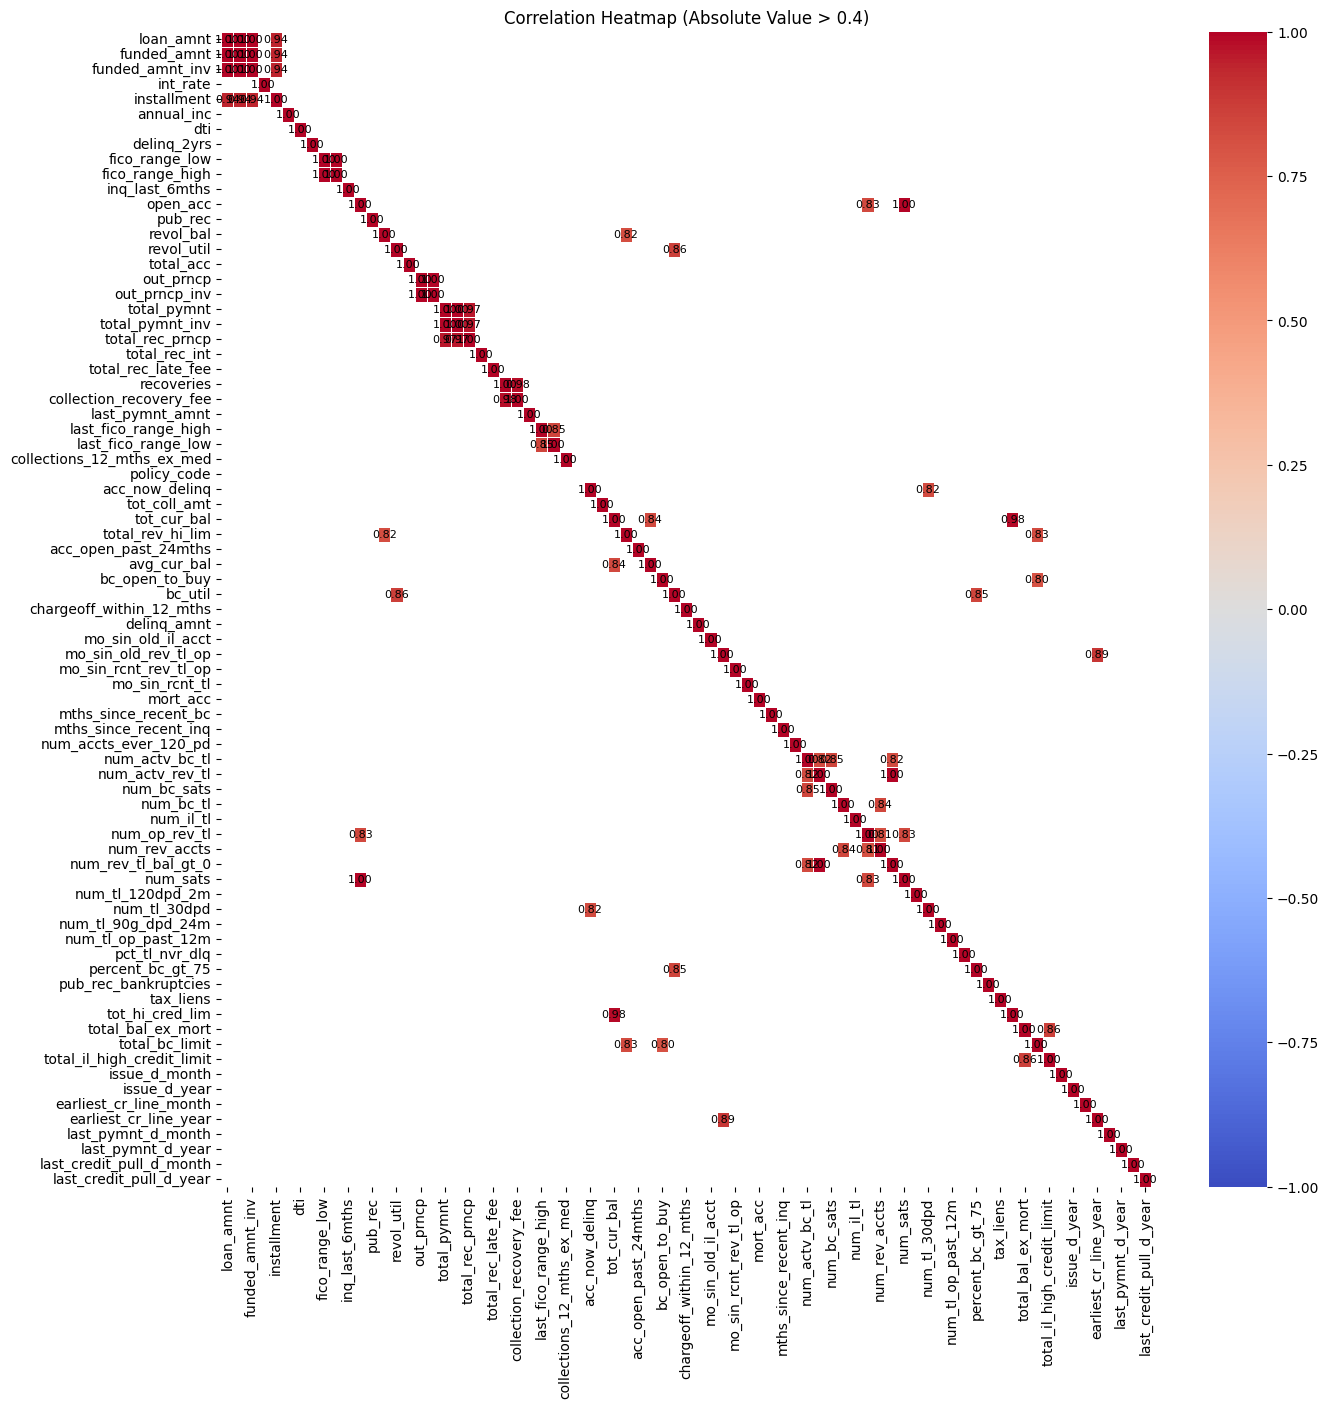

In [11]:

numeric_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = loan_df[numeric_columns].corr().abs()

# Filter correlations greater than 0.4
high_correlation_matrix = correlation_matrix[correlation_matrix > 0.8]

# Plotting the heatmap with improved visibility
plt.figure(figsize=(15, 15))
sns.heatmap(high_correlation_matrix, annot=True, cmap="coolwarm", vmax=1, vmin=-1,
            fmt=".2f", linewidths=.5, annot_kws={"size": 8, "color": 'black'})
plt.title("Correlation Heatmap (Absolute Value > 0.4)")
plt.show()




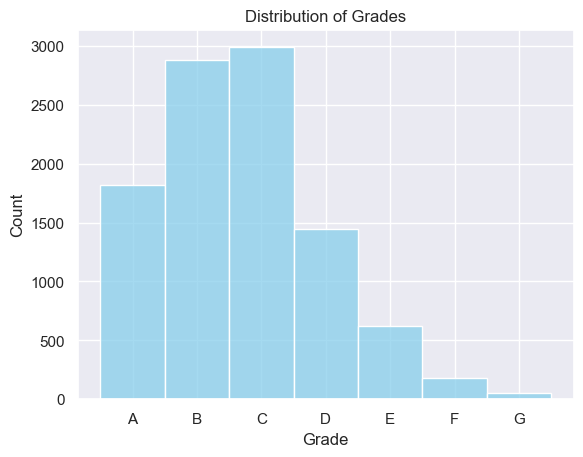

In [12]:
sns.set(style="darkgrid")


grade_order = ['A', 'B', 'C', 'D']

sorted_grades = loan_df['grade'].sort_values(ascending=True)

sns.histplot(data=loan_df, x=sorted_grades, color="skyblue", bins=100)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.show()

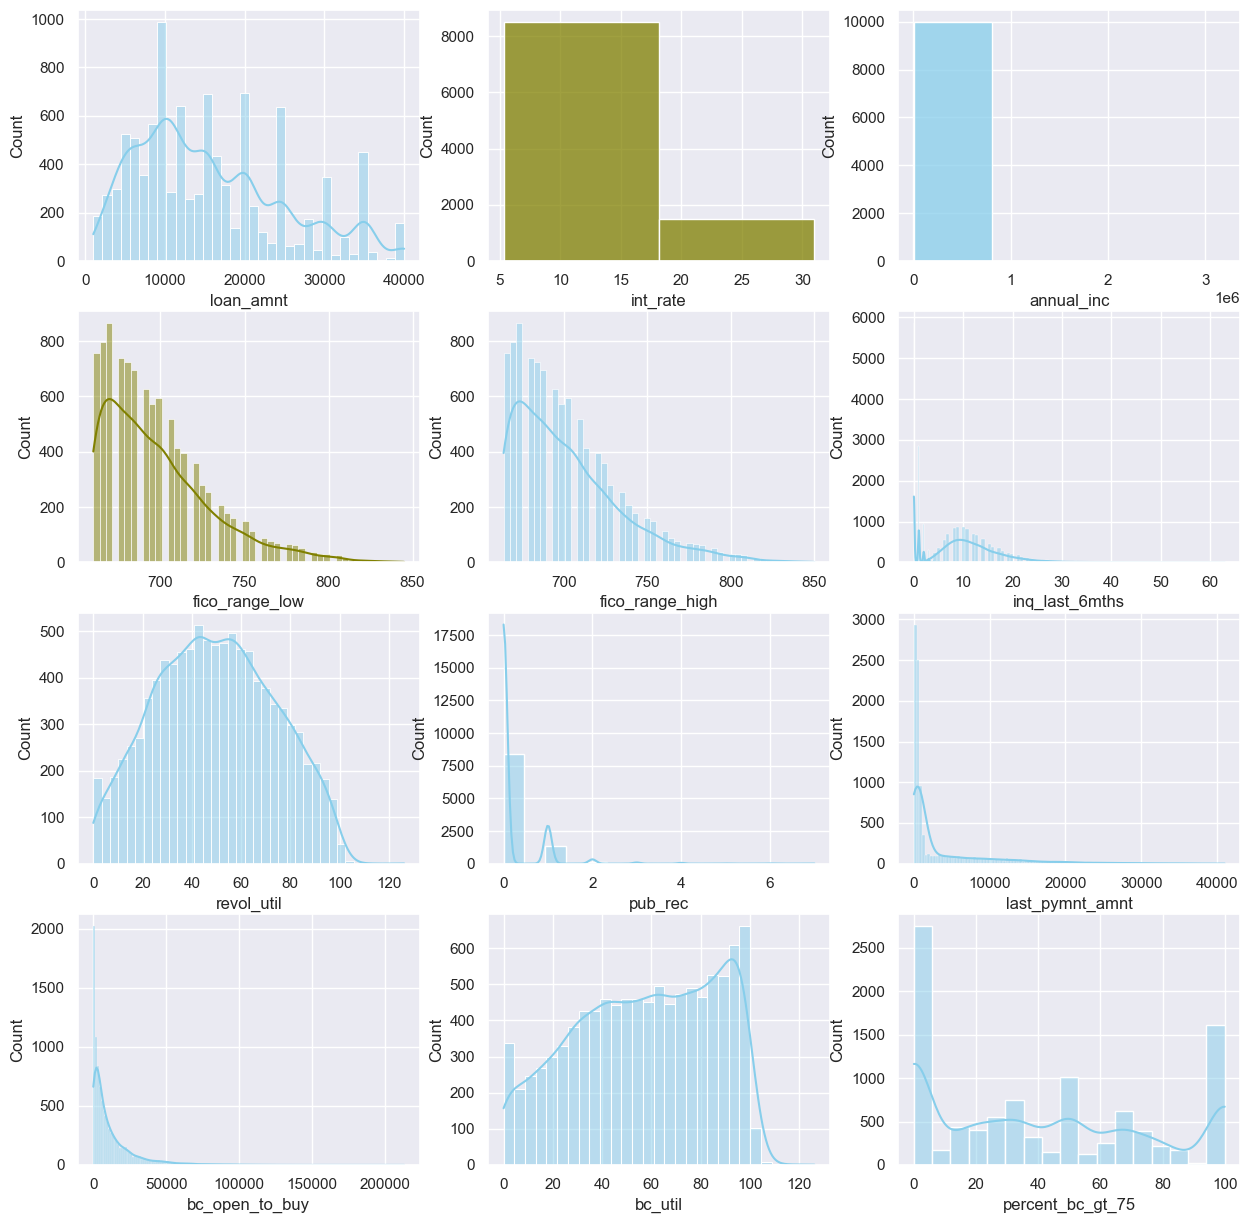

In [13]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 3, figsize=(15, 15))

sns.histplot(data=loan_df, x="loan_amnt", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=loan_df, x="int_rate", bins = 2, color="olive", ax=axs[0, 1])
sns.histplot(data=loan_df, x="annual_inc", bins = 4, color="skyblue", ax=axs[0, 2])
sns.histplot(data=loan_df, x="fico_range_low", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=loan_df, x="fico_range_high", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=loan_df, x="inq_last_6mths", kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=loan_df, x="open_acc", kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=loan_df, x="revol_util", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=loan_df, x="pub_rec", kde=True, color="skyblue", ax=axs[2, 1])
sns.histplot(data=loan_df, x="last_pymnt_amnt", kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=loan_df, x="bc_open_to_buy", kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=loan_df, x="bc_util", kde=True, color="skyblue", ax=axs[3, 1])
sns.histplot(data=loan_df, x="percent_bc_gt_75", kde=True, color="skyblue", ax=axs[3, 2])

plt.show()

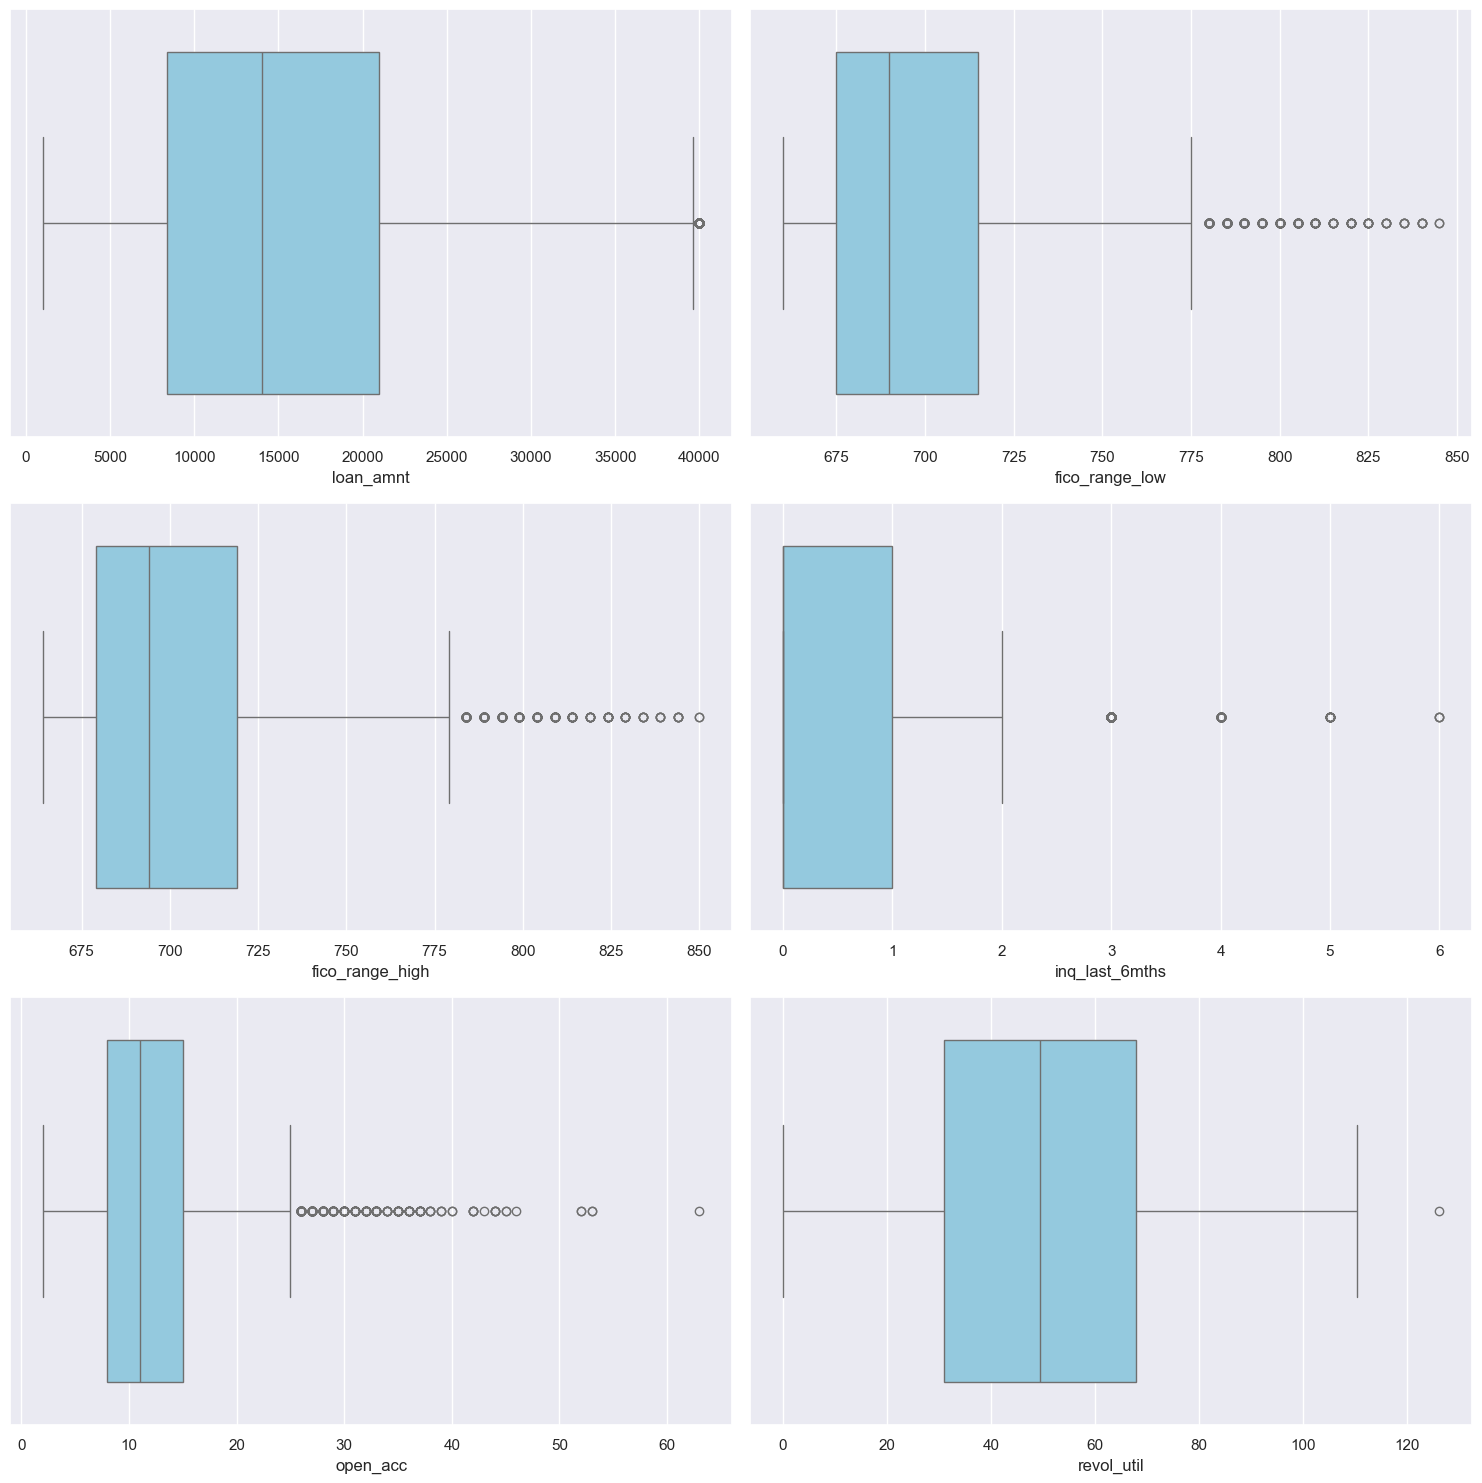

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plotting boxplots
sns.boxplot(data=loan_df, x="loan_amnt", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=loan_df, x="fico_range_low", color="skyblue", ax=axs[0, 1])
sns.boxplot(data=loan_df, x="fico_range_high", color="skyblue", ax=axs[1, 0])
sns.boxplot(data=loan_df, x="inq_last_6mths", color="skyblue", ax=axs[1, 1])
sns.boxplot(data=loan_df, x="open_acc", color="skyblue", ax=axs[2, 0])
sns.boxplot(data=loan_df, x="revol_util", color="skyblue", ax=axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

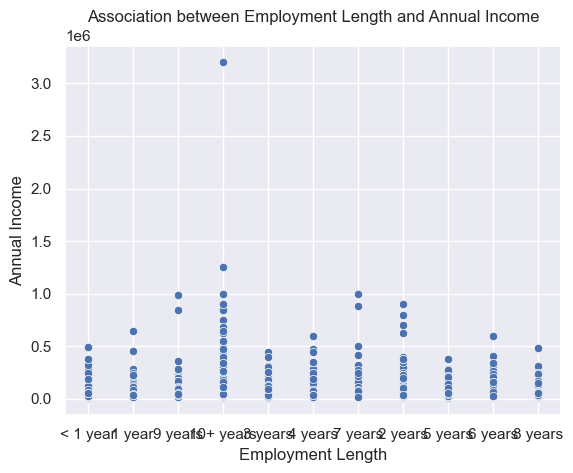

In [15]:
sns.scatterplot(data=loan_df, x='emp_length', y='annual_inc')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income')
plt.title('Association between Employment Length and Annual Income')
plt.show()

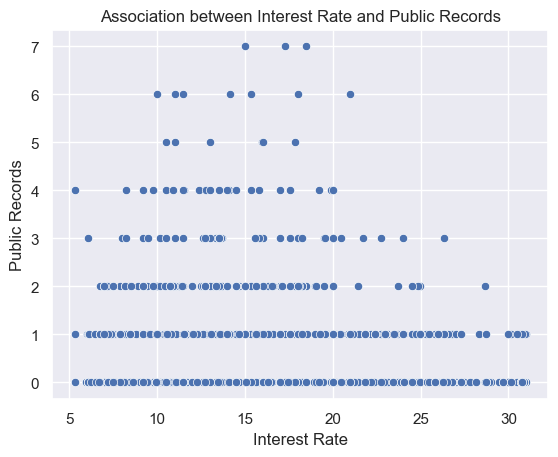

In [16]:
sns.scatterplot(data=loan_df, x='int_rate', y='pub_rec')
plt.xlabel('Interest Rate')
plt.ylabel('Public Records')
plt.title('Association between Interest Rate and Public Records')
plt.show()

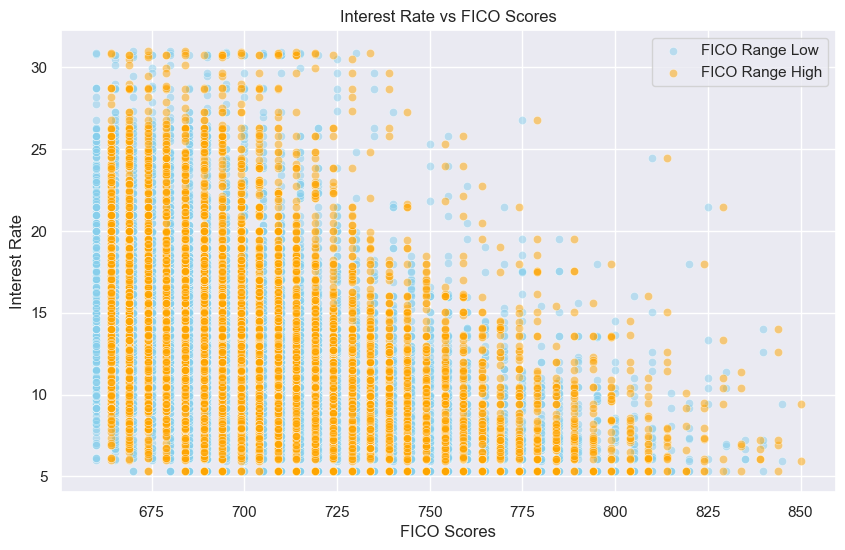

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fico_range_low', y='int_rate', data=loan_df, alpha=0.5, color='skyblue')
sns.scatterplot(x='fico_range_high', y='int_rate', data=loan_df, alpha=0.5, color='orange')
plt.title('Interest Rate vs FICO Scores')
plt.xlabel('FICO Scores')
plt.ylabel('Interest Rate')
plt.legend(['FICO Range Low', 'FICO Range High'])
plt.show()


As FICO scores increase, there is a trend of lower interest rates, indicating a negative correlation. Borrowers with higher credit scores tend to be associated with lower interest rates. This suggests that lenders consider higher creditworthiness, as reflected in FICO scores, when determining interest rates, resulting in a lower cost of borrowing for individuals with better credit.

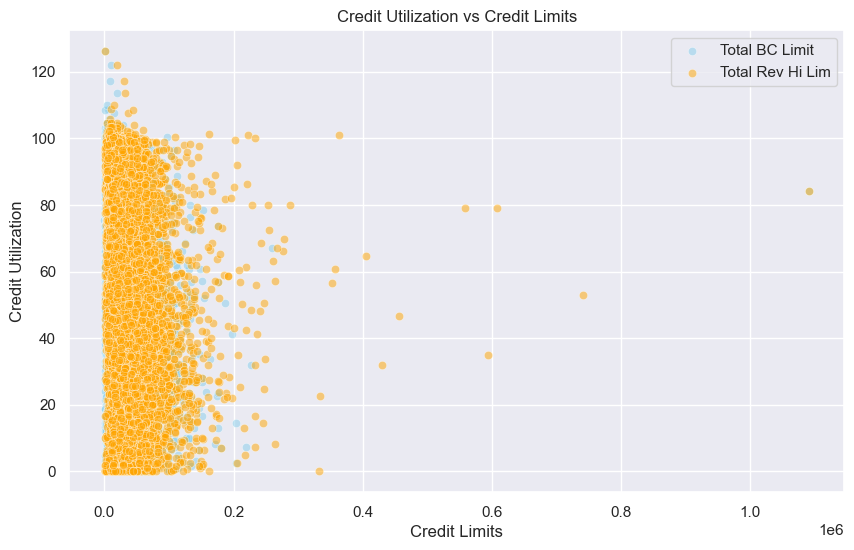

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bc_limit', y='bc_util', data=loan_df, alpha=0.5, color='skyblue')
sns.scatterplot(x='total_rev_hi_lim', y='bc_util', data=loan_df, alpha=0.5, color='orange')
plt.title('Credit Utilization vs Credit Limits')
plt.xlabel('Credit Limits')
plt.ylabel('Credit Utilization')
plt.legend(['Total BC Limit', 'Total Rev Hi Lim'])
plt.show()

The majority of credit utilizations in the dataset fall within the 0.0 to 0.2 range relative to the credit limits. Only a few instances have credit utilizations beyond this range. This pattern suggests that a significant portion of borrowers tends to use a relatively small portion of their available credit, with only a limited number exceeding the 20% utilization mark. Generally, low credit utilization is often considered favorable as it indicates responsible credit management and can positively impact credit scores

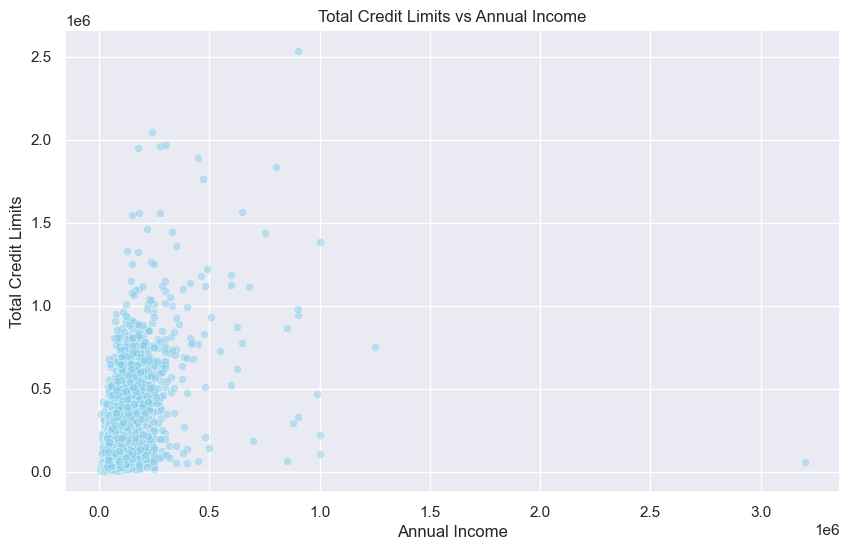

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='tot_hi_cred_lim', data=loan_df, alpha=0.5, color='skyblue')
plt.title('Total Credit Limits vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Total Credit Limits')
plt.show()

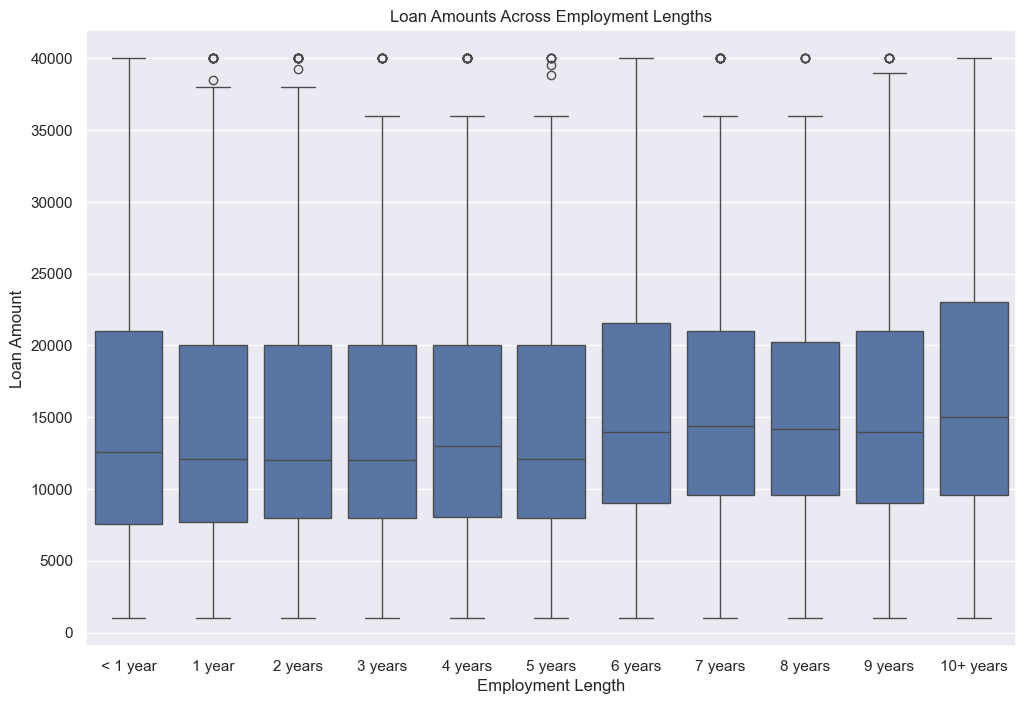

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='emp_length', y='loan_amnt', data=loan_df, order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
plt.title('Loan Amounts Across Employment Lengths')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.show()


When examining boxplots for loan amounts across different employment lengths, it appears that the distribution of loan amounts does not vary significantly among the different employment categories. The boxplots exhibit similar shapes and median values, suggesting that employment length might not be a strong determinant of loan amounts in this dataset.

This observation could imply that, within the available data, the length of employment may not be a critical factor influencing the size of approved loans. Other factors such as credit history, income, or purpose of the loan may be playing more substantial roles in the loan approval process.


---



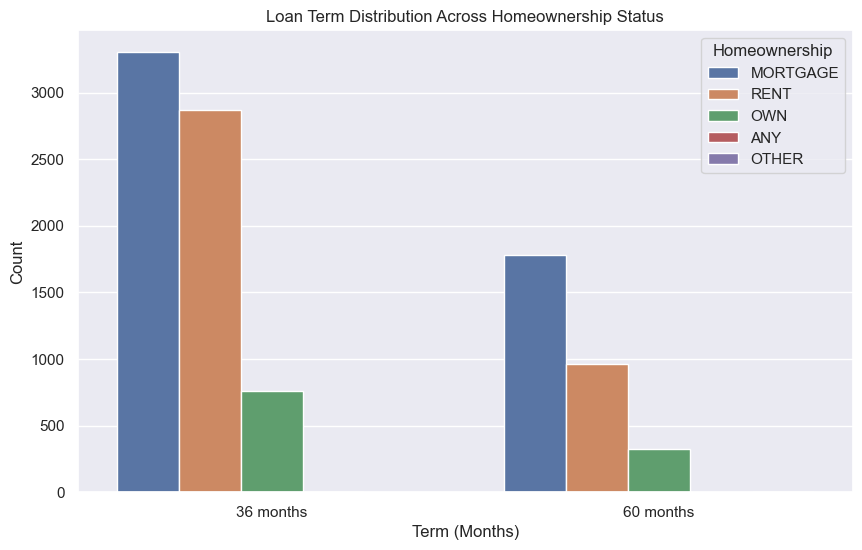

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='home_ownership', data=loan_df, order=['36 months', '60 months'])
plt.title('Loan Term Distribution Across Homeownership Status')
plt.xlabel('Term (Months)')
plt.ylabel('Count')
plt.legend(title='Homeownership')
plt.show()

## Data Preprocessing


In [22]:
def split_data_target(df, target):

    l_df = df.copy()
    target_column = l_df[target]
    data = l_df.drop(columns = target)

    return data,target_column

In [23]:
#train_data,train_column = split_data_target(loan_df,"grade")
from sklearn.model_selection import train_test_split

# Assuming loan_df has features and the target column, replace 'target_column' with your actual target column name
X = loan_df.drop('grade', axis=1)  # Features
y = loan_df['grade']  # Target variable

# Split the data into training and test sets
train_data,test_data, train_column, test_column = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and testing your models


In [24]:
train_data['term'].replace({'36 months': 36, '60 months': 60}, inplace=True)


**Boolean Transformation**

In data preprocessing, boolean values represented as 'n' and 'y' are often replaced with numerical equivalents 0 and 1. This standardization simplifies data representation and ensures compatibility with machine learning models, preventing an unnecessary increase in dimensionality. By encoding 'n' as 0 and 'y' as 1, the transformed data becomes more suitable for algorithms that require numeric input.


In [25]:
train_data['pymnt_plan'].replace({'n': 0, 'y': 1}, inplace=True)
train_data['hardship_flag'].replace({'N': 0, 'Y': 1}, inplace=True)
train_data['debt_settlement_flag'].replace({'N': 0, 'Y': 1}, inplace=True)

In [26]:
def emp_length_to_years(x):
    mapping = {
        '< 1 year': 0,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    return mapping.get(x, x)

In [27]:

train_data['emp_length'] = train_data['emp_length'].apply(emp_length_to_years)


**1-N Enoding**


Other categorical attributes will be transformed with 1-N encoding. In this process, each category or level of a categorical variable is represented as a binary (0 or 1) indicator in a new set of binary columns. Only one of these binary columns is "hot" (set to 1) for each observation, indicating the specific category to which it belongs.

In [28]:
def one_hot_encoding_transformation(df):
    string_train = check_string_values(df)
    train_data = pd.get_dummies(df, columns=string_train)

    return train_data

In [29]:
train_data = one_hot_encoding_transformation(train_data)


We have also created loan_to_income_ratio column on training data.This ratio provides a measure of how much of a borrower's annual income is being utilized to service the loan. It is a financial metric that can be used to assess the affordability of the loan in relation to the borrower's income.



In [30]:
train_data['loan_to_income_ratio'] = train_data['loan_amnt'] / train_data['annual_inc']


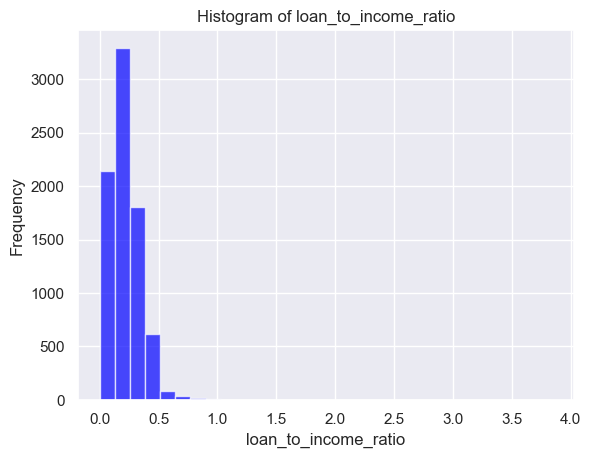

In [31]:
plt.hist(train_data['loan_to_income_ratio'], bins=30, color='blue', alpha=0.7)
plt.xlabel('loan_to_income_ratio')
plt.ylabel('Frequency')
plt.title('Histogram of loan_to_income_ratio')
plt.show()

**Feature Importance**

We used  Random Forest Classifier to assess feature importances in a dataset. After training the model, it retrieves feature importances and creates a DataFrame with feature names and their corresponding importance scores. The DataFrame is then sorted to identify the top 15 features. Feature importance is a crucial concept in machine learning, aiding in the interpretation of model behavior. It helps identify the most influential predictors, guiding the selection of relevant features for model training. This process not only improves model efficiency but also simplifies it by focusing on essential variables. Feature importance analysis is instrumental in detecting redundant or irrelevant features, contributing to effective data preprocessing.Furthermore, feature importance enhances model robustness, ensuring that the model performs well across various scenarios.

/var/folders/kx/nw91brtd18s5sd81ggwq01gw0000gn/T/ipykernel_7718/1690521079.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


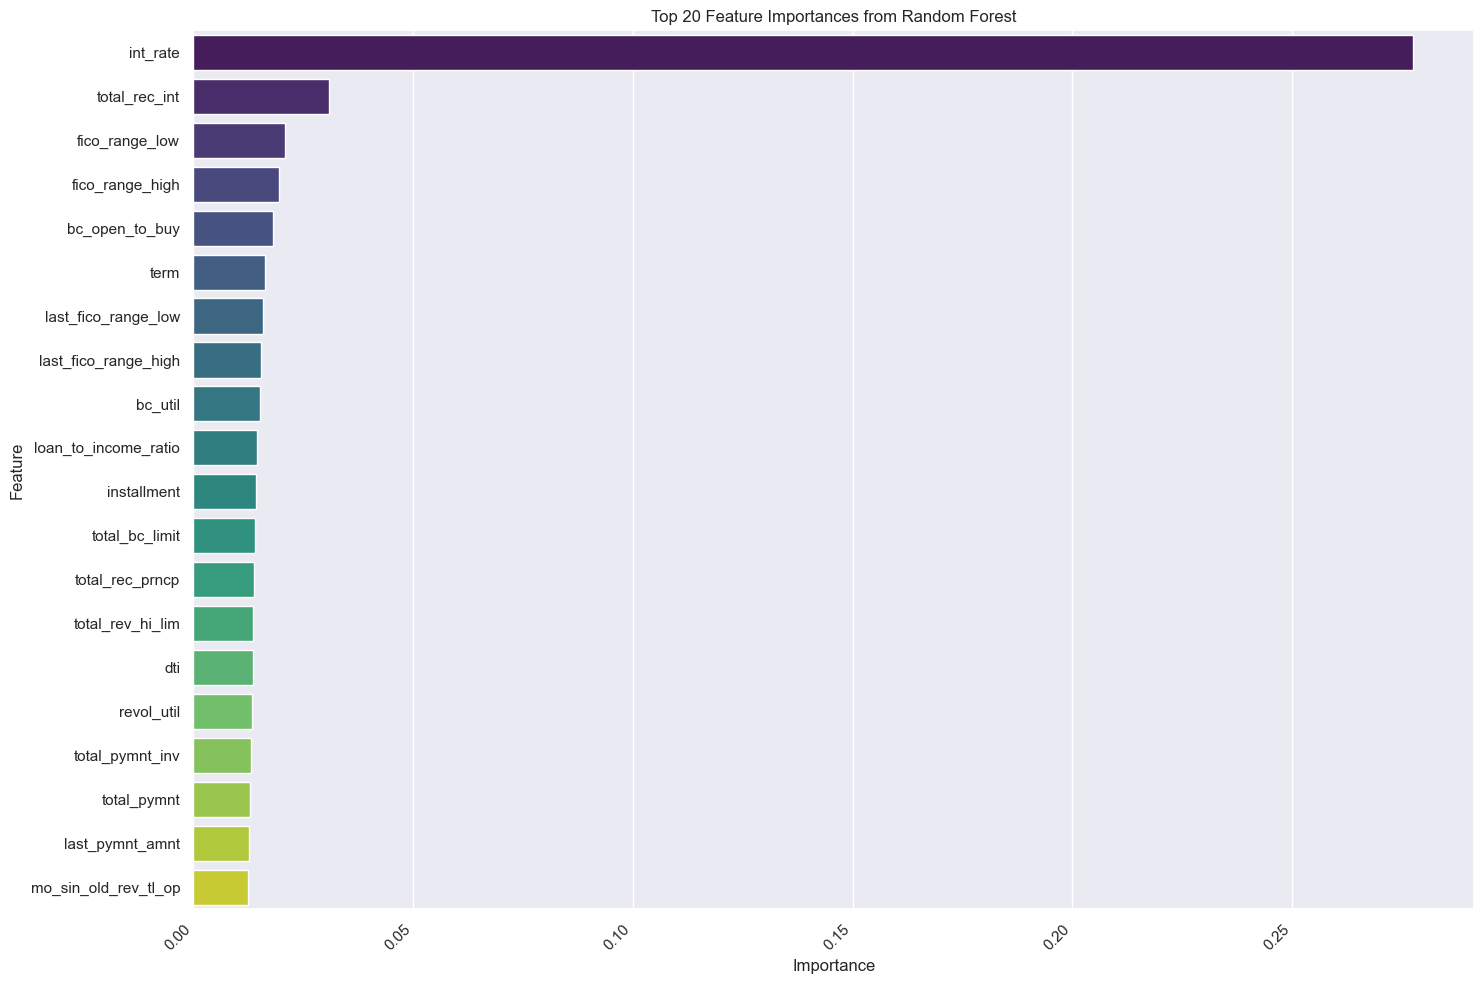

In [32]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(train_data, train_column)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = importance_df.head(20)

# Plot the feature importances with rotated labels
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [33]:
columns_to_keep = top_20_features.Feature.tolist()

train_data = train_data[columns_to_keep]
columns_to_keep

['int_rate',
 'total_rec_int',
 'fico_range_low',
 'fico_range_high',
 'bc_open_to_buy',
 'term',
 'last_fico_range_low',
 'last_fico_range_high',
 'bc_util',
 'loan_to_income_ratio',
 'installment',
 'total_bc_limit',
 'total_rec_prncp',
 'total_rev_hi_lim',
 'dti',
 'revol_util',
 'total_pymnt_inv',
 'total_pymnt',
 'last_pymnt_amnt',
 'mo_sin_old_rev_tl_op']

## Handling Outliers

We are using two types of methods handling outliers:


*   Log Transformation - which will be done on continous values and binary values will be excluded from this calculation
*   Interquartile Range



In [34]:
# Log Transformation
def log_transform_non_binary_columns(input_data):
    # Identify binary columns
    binary_columns = [col for col in input_data.columns
                      if input_data[col].nunique() == 2 and set(input_data[col].unique()) <= {0, 1}]

    # Identify non-binary columns
    non_binary_columns = [col for col in input_data.columns if col not in binary_columns]

    # Create a copy of the input data
    output_data = input_data.copy()

    # Log transform only non-binary columns
    output_data[non_binary_columns] = output_data[non_binary_columns].apply(lambda x: np.log1p(x))

    return output_data


In [35]:
# Interquartile Range transformation with replacing outliers by mean
def interquartile_range(dataframe, column_names):
    dataframe_no_outliers = dataframe.copy()  # Create a copy to avoid modifying the original DataFrame

    for column_name in column_names:
        Q1 = dataframe_no_outliers[column_name].quantile(0.25)
        Q3 = dataframe_no_outliers[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outliers_mask = (dataframe_no_outliers[column_name] < Q1 - 1.5 * IQR) | (dataframe_no_outliers[column_name] > Q3 + 1.5 * IQR)

        # Replace outliers with mean
        mean_value = dataframe_no_outliers[column_name].mean()
        dataframe_no_outliers.loc[outliers_mask, column_name] = mean_value

    return dataframe_no_outliers


In [36]:
#Log transformed dataset
train_data_log = log_transform_non_binary_columns(train_data)

#Interquartile range transformed dataset
train_data_iqr = interquartile_range(train_data,train_data.columns)

/var/folders/kx/nw91brtd18s5sd81ggwq01gw0000gn/T/ipykernel_7718/4288824670.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '43.359' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe_no_outliers.loc[outliers_mask, column_name] = mean_value


## Scaling Data

We employed three distinct scaling techniques:
Standard Scaler: This method involves subtracting the mean and dividing all values by the standard deviation. The result is a distribution with a mean of 0, and approximately 68% of values fall between -1 and 1 standard deviations. While suitable for data with negative values, it may distort relative distances between feature values.

MinMax Scaler: For each value, this scaler subtracts the minimum and divides by the difference between the original maximum and minimum. It scales data to a predefined interval, typically between 0 and 1. This scaler is advantageous when feature distributions are not Gaussian.

Robust Scaler: This scaler transforms the feature vector by subtracting the median and dividing by the interquartile range. It proves useful when dealing with data containing outliers, as it mitigates the impact of these extreme values.


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Applying Scaling to train_data, train_data_lt, train_data_iqr

# Standard Scaler
standard_scaler = StandardScaler()
train_data_scaled = pd.DataFrame(standard_scaler.fit_transform(train_data), columns=train_data.columns)
train_data_lt_scaled = pd.DataFrame(standard_scaler.transform(train_data_log), columns=train_data_log.columns)
train_data_iqr_scaled = pd.DataFrame(standard_scaler.transform(train_data_iqr), columns=train_data_iqr.columns)

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
train_data_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(train_data), columns=train_data.columns)
train_data_lt_scaled_minmax = pd.DataFrame(minmax_scaler.transform(train_data_log), columns=train_data_log.columns)
train_data_iqr_scaled_minmax = pd.DataFrame(minmax_scaler.transform(train_data_iqr), columns=train_data_iqr.columns)

# Robust Scaler
robust_scaler = RobustScaler()
train_data_scaled_robust = pd.DataFrame(robust_scaler.fit_transform(train_data), columns=train_data.columns)
train_data_lt_scaled_robust = pd.DataFrame(robust_scaler.transform(train_data_log), columns=train_data_log.columns)
train_data_iqr_scaled_robust = pd.DataFrame(robust_scaler.transform(train_data_iqr), columns=train_data_iqr.columns)


Models we want to use are:

Logistic Regression, Decission Tree, SVM, Knn, Random Forest, Gradient Boosting, NN

In [38]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score


# Assuming you have the following DataFrames: train_data, train_data_log, train_data_iqr, train_data_scaled, train_data_scaled_minmax, train_data_scaled_robust
# And corresponding target variable: train_column

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define hyperparameter grids for RandomizedSearchCV

param_distributions = {
    'Logistic Regression': {'C': [0.1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 20, 50], 'min_samples_split': [5, 10]},
    'Random Forest': {'n_estimators': [50, 100,300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1,]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}

data_versions = {
    #"Original" : train_data,
    #"Original Log Transformed" : train_data_log,
    #"Original IQR Transformed" : train_data_iqr,
    "Standard Scaled" : train_data_scaled,
    "MinMax Scaled" : train_data_scaled_minmax,
    "Robust Scaled" : train_data_scaled_robust,
    "Log Standard Scaled" : train_data_lt_scaled,
    "Log MinMax Scaled" : train_data_lt_scaled_minmax,
    "Log Robust Scaled" : train_data_lt_scaled_robust,
    "IQR Standard Scaled" : train_data_iqr_scaled,
    "IQR MinMax Scaled " : train_data_iqr_scaled_minmax,
    "IQR Robust Scaled " : train_data_iqr_scaled_robust
}



scoring_metrics = {'precision': precision_score, 'accuracy': accuracy_score, 'recall': recall_score, 'f1': f1_score}








In [39]:
import time
results = {}
fitting_times = {}

# Loop through models
for model_name, model in models.items():
    fitting_times[model_name] = {}  # Initialize dictionary for fitting times
    # Loop through data versions
    for version_name, data_version in data_versions.items():
        # Split data into features and target
        X = data_version
        y = train_column

        # Record start time
        start_time = time.time()

        # Perform RandomizedSearchCV
        random_search = RandomizedSearchCV(
            model,
            param_distributions[model_name],
            n_iter=10,
            scoring='accuracy',  # Use accuracy as the primary metric for optimization
            cv=KFold(n_splits=5, shuffle=True, random_state=42),
            random_state=42,
            n_jobs=-1
        )

        # Fit the model
        random_search.fit(X, y)

        # Record end time
        end_time = time.time()

        # Calculate fitting time
        fitting_time = end_time - start_time

        # Store fitting time in the dictionary
        fitting_times[model_name][version_name] = fitting_time

        # Get best parameters
        best_params = random_search.best_params_

        # Evaluate other metrics
        metrics = {
            'precision': precision_score(y, random_search.best_estimator_.predict(X), average='macro'),
            'accuracy': accuracy_score(y, random_search.best_estimator_.predict(X)),
            'recall': recall_score(y, random_search.best_estimator_.predict(X), average='macro'),
            'f1': f1_score(y, random_search.best_estimator_.predict(X), average='macro')
        }

        # Store results in the dictionary
        if model_name not in results:
            results[model_name] = {}

        results[model_name][version_name] = {
            'best_params': best_params,
            **metrics
        }

        

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

KeyboardInterrupt: 

In [ ]:

# Print results
for model_name, versions in results.items():
    print(f"\nResults for {model_name}:")
    for version_name, metrics in versions.items():
        print(f"{version_name}: Best Params - {metrics['best_params']}, Precision - {metrics['precision']:.4f}, Accuracy - {metrics['accuracy']:.4f}, Recall - {metrics['recall']:.4f}, F1 - {metrics['f1']:.4f}")

  


Results for Logistic Regression:
Standard Scaled: Best Params - {'C': 100}, Precision - 0.7671, Accuracy - 0.8745, Recall - 0.7246, F1 - 0.7419
MinMax Scaled: Best Params - {'C': 100}, Precision - 0.7124, Accuracy - 0.8708, Recall - 0.6803, F1 - 0.6937
Robust Scaled: Best Params - {'C': 10}, Precision - 0.7783, Accuracy - 0.8762, Recall - 0.7100, F1 - 0.7312
Log Standard Scaled: Best Params - {'C': 10}, Precision - 0.3593, Accuracy - 0.6439, Recall - 0.3633, F1 - 0.3486
Log MinMax Scaled: Best Params - {'C': 100}, Precision - 0.4319, Accuracy - 0.6995, Recall - 0.4106, F1 - 0.4029
Log Robust Scaled: Best Params - {'C': 10}, Precision - 0.3462, Accuracy - 0.6690, Recall - 0.3753, F1 - 0.3482
IQR Standard Scaled: Best Params - {'C': 10}, Precision - 0.7750, Accuracy - 0.8452, Recall - 0.5814, F1 - 0.5901
IQR MinMax Scaled : Best Params - {'C': 100}, Precision - 0.6313, Accuracy - 0.8434, Recall - 0.5700, F1 - 0.5755
IQR Robust Scaled : Best Params - {'C': 10}, Precision - 0.7755, Accura

/var/folders/kx/nw91brtd18s5sd81ggwq01gw0000gn/T/ipykernel_7718/1984406615.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Model', y='Accuracy', hue='Scaler', data=df, palette='viridis', ci=None, dodge=True, markers='o', capsize=0.2)


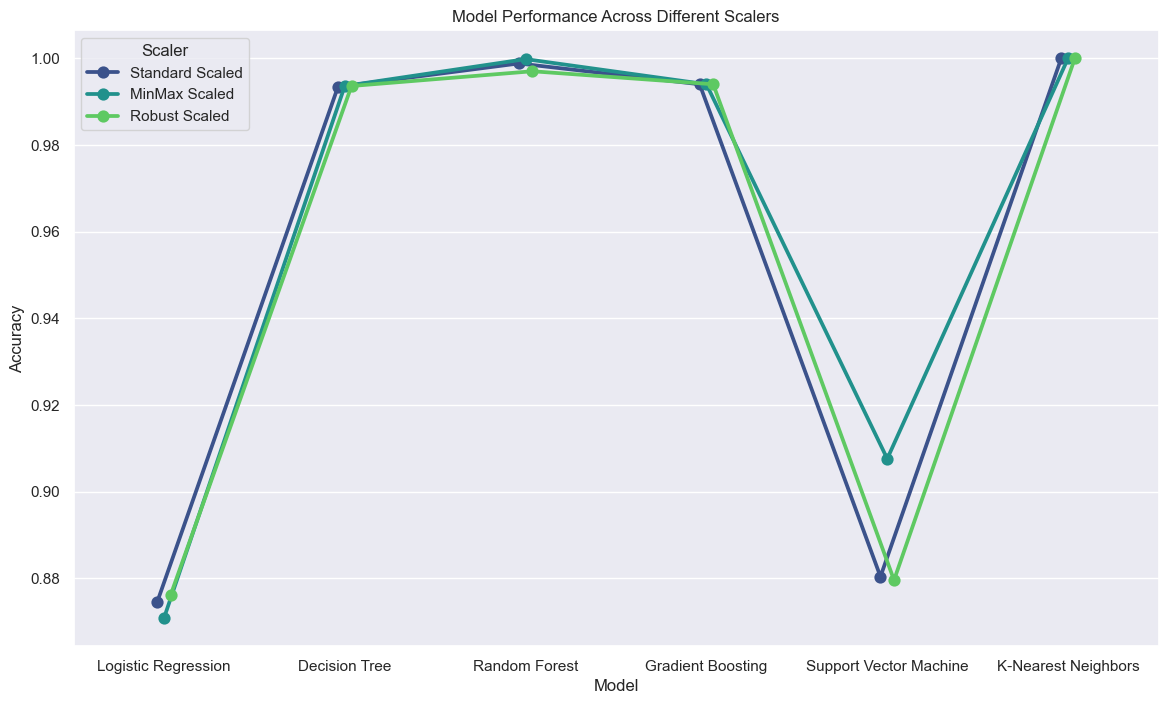

In [40]:

results_f1= {
    'Logistic Regression': {
        'Standard Scaled': {'best_params': {'C': 100}, 'precision': 0.7671, 'accuracy': 0.8745, 'recall': 0.7246, 'f1': 0.7419},
        'MinMax Scaled': {'best_params': {'C': 100}, 'precision': 0.7124, 'accuracy': 0.8708, 'recall': 0.6803, 'f1': 0.6937},
        'Robust Scaled': {'best_params': {'C': 10}, 'precision': 0.7783, 'accuracy': 0.8762, 'recall': 0.7100, 'f1': 0.7312}
    },
    'Decision Tree': {
        'Standard Scaled': {'best_params': {'min_samples_split': 5, 'max_depth': None}, 'precision': 0.9873, 'accuracy': 0.9934, 'recall': 0.9803, 'f1': 0.9837},
        'MinMax Scaled': {'best_params': {'min_samples_split': 5, 'max_depth': 50}, 'precision': 0.9878, 'accuracy': 0.9936, 'recall': 0.9803, 'f1': 0.9840},
        'Robust Scaled': {'best_params': {'min_samples_split': 5, 'max_depth': 20}, 'precision': 0.9878, 'accuracy': 0.9936, 'recall': 0.9803, 'f1': 0.9840}
        # Repeat the structure for other scalers of Decision Tree
    },
    'Random Forest': {
        'Standard Scaled': {'best_params': {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}, 'precision': 0.9993, 'accuracy': 0.9988, 'recall': 0.9994, 'f1': 0.9993},
        'MinMax Scaled': {'best_params': {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': None}, 'precision': 0.9999, 'accuracy': 0.9998, 'recall': 0.9998, 'f1': 0.9998},
        'Robust Scaled': {'best_params': {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}, 'precision': 0.9982, 'accuracy': 0.9970, 'recall': 0.9980, 'f1': 0.9981}
        # Repeat the structure for other scalers of Random Forest
    },
    'Gradient Boosting': {
        'Standard Scaled': {'best_params': {'n_estimators': 200, 'learning_rate': 0.1}, 'precision': 0.9958, 'accuracy': 0.9940, 'recall': 0.9945, 'f1': 0.9951},
        'MinMax Scaled': {'best_params': {'n_estimators': 200, 'learning_rate': 0.1}, 'precision': 0.9958, 'accuracy': 0.9940, 'recall': 0.9945, 'f1': 0.9951},
        'Robust Scaled': {'best_params': {'n_estimators': 200, 'learning_rate': 0.1}, 'precision': 0.9958, 'accuracy': 0.9940, 'recall': 0.9945, 'f1': 0.9951}
        # Repeat the structure for other scalers of Gradient Boosting
    },
    'Support Vector Machine': {
        'Standard Scaled': {'best_params': {'kernel': 'linear', 'C': 10}, 'precision': 0.7785, 'accuracy': 0.8804, 'recall': 0.7334, 'f1': 0.7518},
        'MinMax Scaled': {'best_params': {'kernel': 'rbf', 'C': 10}, 'precision': 0.8843, 'accuracy': 0.9076, 'recall': 0.8017, 'f1': 0.8311},
        'Robust Scaled': {'best_params': {'kernel': 'linear', 'C': 10}, 'precision': 0.7842, 'accuracy': 0.8796, 'recall': 0.7338, 'f1': 0.7535}
        # Repeat the structure for other scalers of SVM
    },
    'K-Nearest Neighbors': {
        'Standard Scaled': {'best_params': {'weights': 'distance', 'n_neighbors': 9}, 'precision': 1.0000, 'accuracy': 1.0000, 'recall': 1.0000, 'f1': 1.0000},
        'MinMax Scaled': {'best_params': {'weights': 'distance', 'n_neighbors': 9}, 'precision': 1.0000, 'accuracy': 1.0000, 'recall': 1.0000, 'f1': 1.0000},
        'Robust Scaled': {'best_params': {'weights': 'distance', 'n_neighbors': 9}, 'precision': 1.0000, 'accuracy': 1.0000, 'recall': 1.0000, 'f1': 1.0000}
        # Repeat the structure for other scalers of K-Nearest Neighbors
    }
    # ... Repeat the structure for other models
}

# Create a DataFrame from the results
data = []

for model, scalers in results_f1.items():
    for scaler, metrics in scalers.items():
        data.append({
            'Model': model,
            'Scaler': scaler,
            'Accuracy': metrics['accuracy']
        })


df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
sns.pointplot(x='Model', y='Accuracy', hue='Scaler', data=df, palette='viridis', ci=None, dodge=True, markers='o', capsize=0.2)

# Add legend
plt.legend(title='Scaler')

# Set labels and title
plt.title('Model Performance Across Different Scalers')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the plot
plt.show()




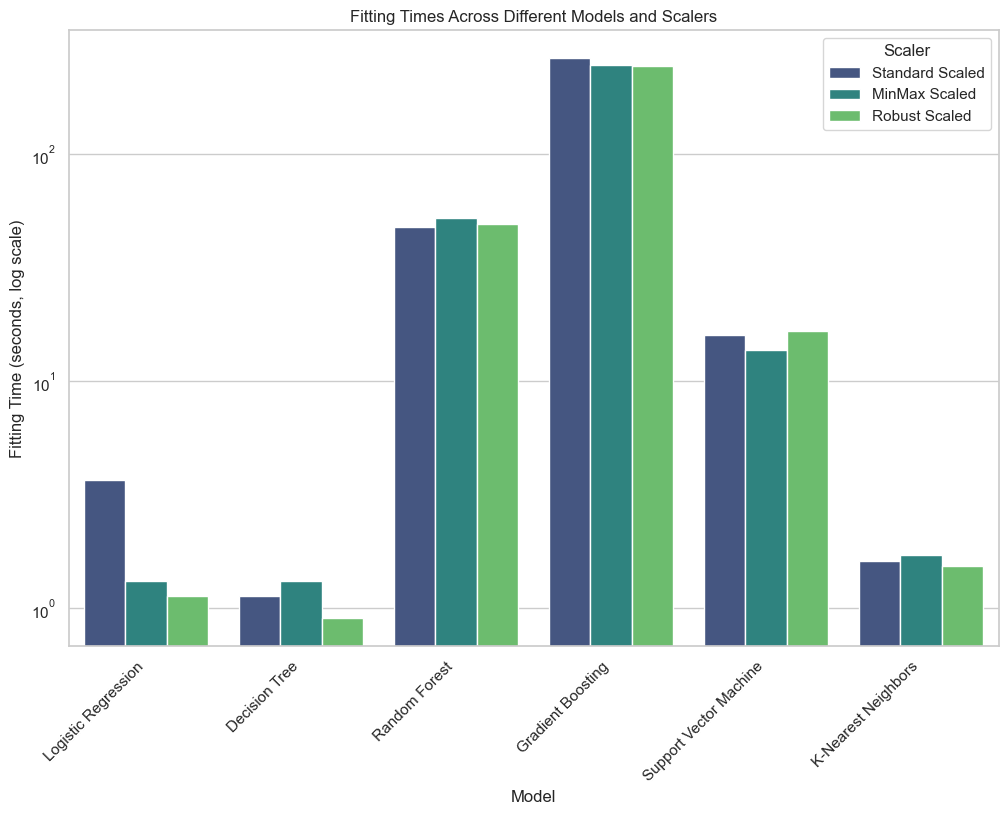

In [41]:

fitting_times_data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Logistic Regression',
              'Decision Tree', 'Decision Tree', 'Decision Tree',
              'Random Forest', 'Random Forest', 'Random Forest',
              'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
              'Support Vector Machine', 'Support Vector Machine', 'Support Vector Machine',
              'K-Nearest Neighbors', 'K-Nearest Neighbors', 'K-Nearest Neighbors'],
    'Scaler': ['Standard Scaled', 'MinMax Scaled', 'Robust Scaled'] * 6,
    'Fitting Time': [
        3.672344207763672, 1.3129990100860596, 1.1283180713653564,
        1.137984037399292, 1.3260948657989502, 0.9033830165863037,
        47.621520042419434, 52.563642740249634, 49.36822199821472,
        264.49790716171265, 247.60578393936157, 244.25371980667114,
        16.065559148788452, 13.682945013046265, 16.627655029296875,
        1.6200740337371826, 1.7212579250335693, 1.542090892791748,
    ],
}

# Convert the data to a DataFrame for easier plotting
df = pd.DataFrame(fitting_times_data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Fitting Time', hue='Scaler', data=df, palette='viridis')

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Customize the plot
plt.title('Fitting Times Across Different Models and Scalers')
plt.xlabel('Model')
plt.ylabel('Fitting Time (seconds, log scale)')
plt.legend(title='Scaler')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



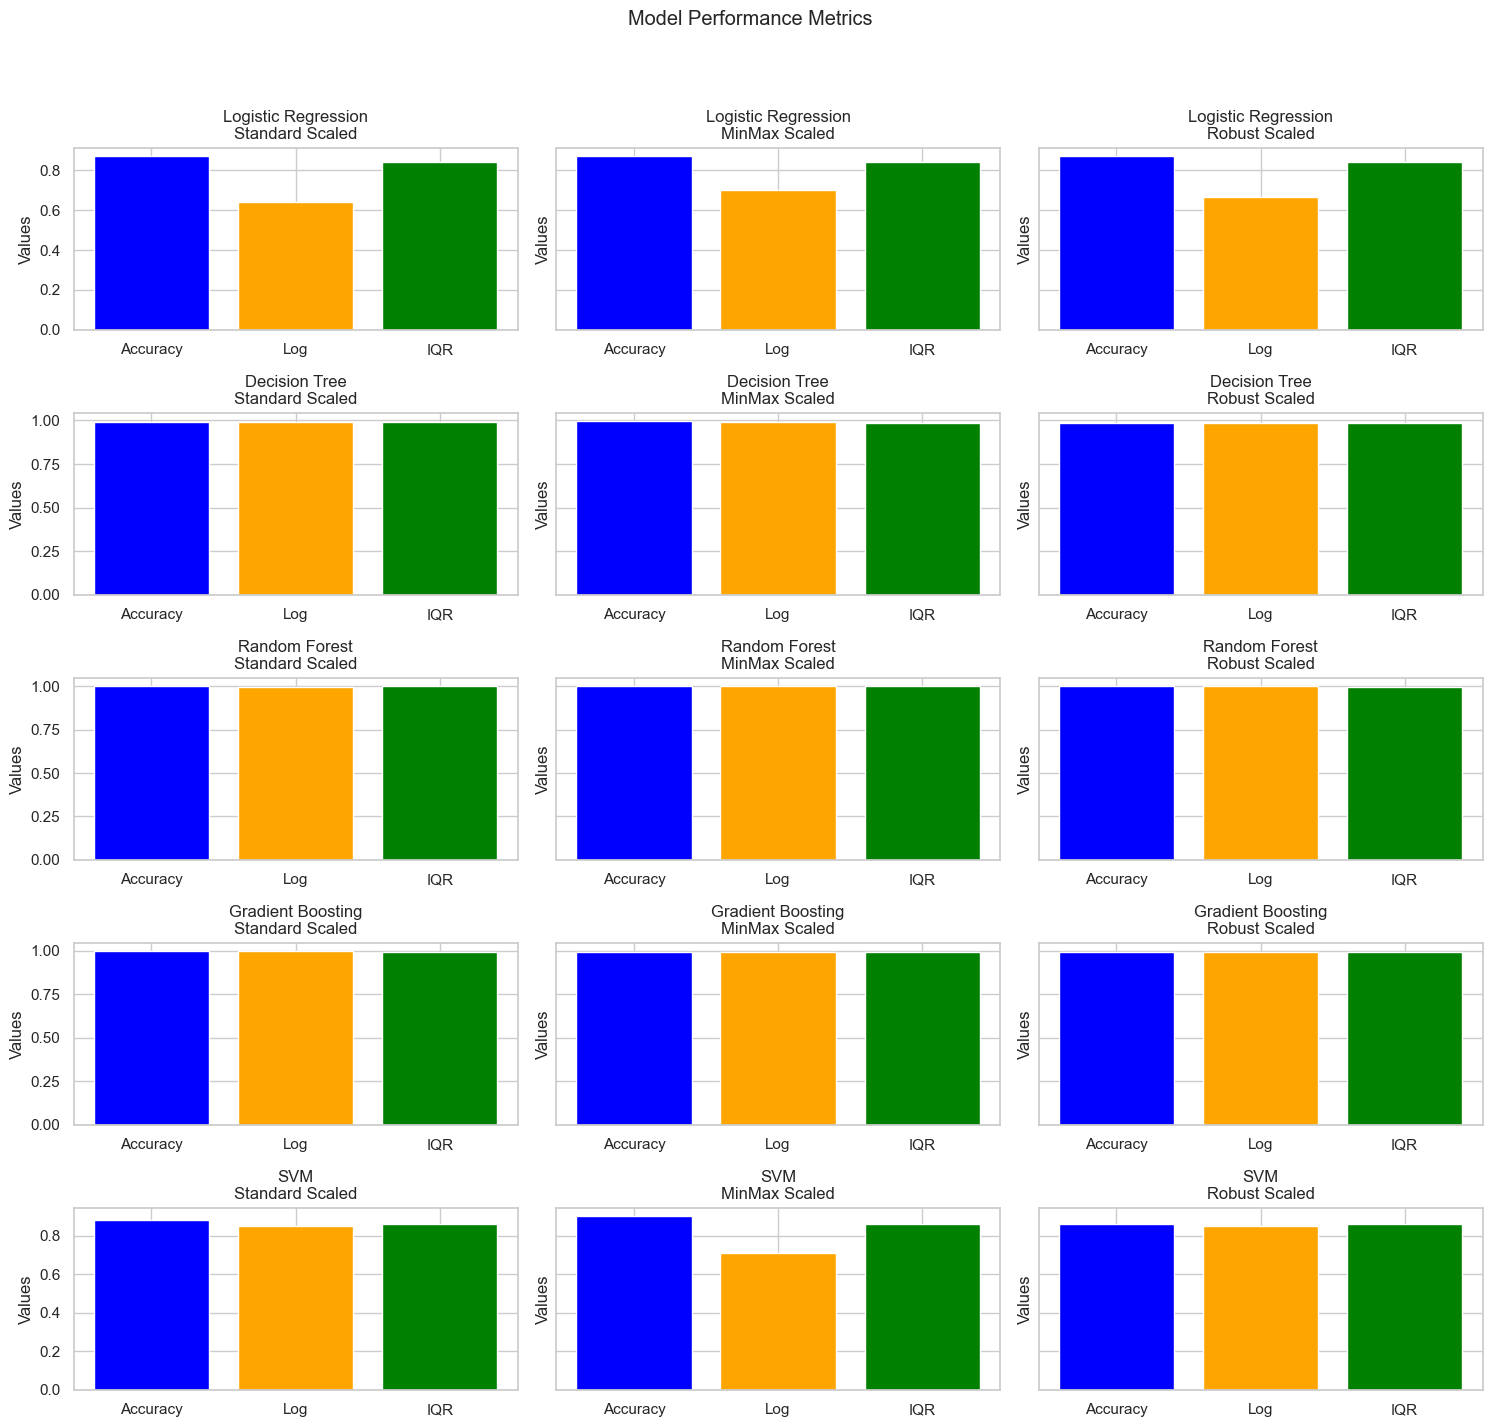

In [42]:


# Replace this with  actual data
data = {
    'Logistic Regression': {
        'Standard Scaled': {'Accuracy': 0.87, 'Log': 0.6439, 'IQR': 0.84},#IQR
        'MinMax Scaled': {'Accuracy':0.87, 'Log': 0.6995, 'IQR': 0.84},#IQR
        'Robust Scaled': {'Accuracy': 0.87, 'Log': 0.6690, 'IQR': 0.84},#IQR
    },
    'Decision Tree': {
        'Standard Scaled': {'Accuracy': 0.9934, 'Log': 0.9934, 'IQR': 0.99},#Log
        'MinMax Scaled': {'Accuracy':0.9939, 'Log': 0.9936, 'IQR': 0.9831},
        'Robust Scaled': {'Accuracy': 0.9878, 'Log': 0.9828, 'IQR': 0.9829},
    },
      'Random Forest': {
        'Standard Scaled': {'Accuracy': 1.00, 'Log': 0.9994, 'IQR': 1.00},
        'MinMax Scaled': {'Accuracy':1.00, 'Log': 1.00, 'IQR': 1.00},
        'Robust Scaled': {'Accuracy': 1.00, 'Log': 1.00, 'IQR': 0.9998},
    },

     'Gradient Boosting': {
        'Standard Scaled': {'Accuracy': 0.9945, 'Log': 0.9945, 'IQR': 0.9919},
        'MinMax Scaled': {'Accuracy': 0.9940, 'Log': 0.9916, 'IQR': 0.9919},
        'Robust Scaled': {'Accuracy': 0.9942, 'Log': 0.9942, 'IQR': 0.9919},
    },


     'SVM': {
        'Standard Scaled': {'Accuracy': 0.8804, 'Log': 0.85, 'IQR': 0.86},
        'MinMax Scaled': {'Accuracy': 0.90, 'Log': 0.71, 'IQR': 0.86},
        'Robust Scaled': {'Accuracy': 0.86, 'Log': 0.85, 'IQR': 0.86},
    },

}

models = list(data.keys())
scaling_methods = list(data[models[0]].keys())
metrics = list(data[models[0]][scaling_methods[0]].keys())

# Create subplots
fig, axs = plt.subplots(len(models), len(scaling_methods), figsize=(15, 15), sharey='row')

for i, model in enumerate(models):
    for j, scaling_method in enumerate(scaling_methods):
        values = [data[model][scaling_method][metric] for metric in metrics]
        x = np.arange(len(metrics))
        
        axs[i, j].bar(x, values, color=['blue', 'orange', 'green'])
        axs[i, j].set_xticks(x)
        axs[i, j].set_xticklabels(metrics)
        axs[i, j].set_title(f'{model}\n{scaling_method}')

for ax in axs.flat:
    ax.set(ylabel='Values')
fig.suptitle('Model Performance Metrics')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



## Evaluation
After getting best hyperparameters for our models, we will not evaluate our models using best params.


### Loading and preprocessing Test data

Loading and preprocessing test data is crucial for evaluating machine learning models effectively. This involves reading and organizing the dataset, addressing missing or inconsistent data, and applying consistent preprocessing techniques as used during training. By ensuring the test data is treated comparably to the training data, researchers can obtain accurate insights into the model's generalization performance on new, unseen information. This step is essential for maintaining model robustness and reliability in real-world applications.


In [43]:
test_data['term'] = test_data['term'].apply(lambda x: x.strip())
test_data['term'].replace({'36 months': 36, '60 months': 60}, inplace=True)


In [44]:
#Test Data
test_data['pymnt_plan'].replace({'n': 0, 'y': 1}, inplace=True)
test_data['hardship_flag'].replace({'N': 0, 'Y': 1}, inplace=True)
test_data['debt_settlement_flag'].replace({'N': 0, 'Y': 1}, inplace=True)

In [45]:
test_data['emp_length'] = test_data['emp_length'].apply(emp_length_to_years)

In [46]:
test_data = one_hot_encoding_transformation(test_data)


In [47]:
test_data['loan_to_income_ratio'] = test_data['loan_amnt'] / test_data['annual_inc']


In [48]:
test_data = test_data[columns_to_keep]

In [49]:
#Log transformed Test dataset
test_data_log = log_transform_non_binary_columns(test_data)

#Interquartile range transformed Test dataset
test_data_iqr = interquartile_range(test_data, test_data.columns)

/var/folders/kx/nw91brtd18s5sd81ggwq01gw0000gn/T/ipykernel_7718/4288824670.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '43.368' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe_no_outliers.loc[outliers_mask, column_name] = mean_value


In [50]:

# Applying Scaling to test_data, test_data_lt, test_data_iqr

# Standard Scaler
standard_scaler = StandardScaler()
test_data_scaled = pd.DataFrame(standard_scaler.fit_transform(test_data), columns=test_data.columns)
test_data_lt_scaled = pd.DataFrame(standard_scaler.transform(test_data_log), columns=test_data_log.columns)
test_data_iqr_scaled = pd.DataFrame(standard_scaler.transform(test_data_iqr), columns=test_data_iqr.columns)

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
test_data_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(test_data), columns=test_data.columns)
test_data_lt_scaled_minmax = pd.DataFrame(minmax_scaler.transform(test_data_log), columns=test_data_log.columns)
test_data_iqr_scaled_minmax = pd.DataFrame(minmax_scaler.transform(test_data_iqr), columns=test_data_iqr.columns)

# Robust Scaler
robust_scaler = RobustScaler()
test_data_scaled_robust = pd.DataFrame(robust_scaler.fit_transform(test_data), columns=test_data.columns)
test_data_lt_scaled_robust = pd.DataFrame(robust_scaler.transform(test_data_log), columns=test_data_log.columns)
train_data_iqr_scaled_robust = pd.DataFrame(robust_scaler.transform(test_data_iqr), columns=test_data_iqr.columns)

***Fitting Data***

In [51]:
#Random Forest

import time
start_time = time.time()
random_forest_model = RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_depth = None)
random_forest_model.fit(train_data_lt_scaled_minmax,train_column)

end_time = time.time()
fit_time = end_time - start_time
#12seconds run time

print(f"Random Forest fit time is", {fit_time})


Random Forest fit time is {2.668149948120117}


In [52]:
#Decision Tree

start_time = time.time()
decision_tree_model = DecisionTreeClassifier(min_samples_split= 10,max_depth = None)
decision_tree_model.fit(train_data_lt_scaled_minmax,train_column)

end_time = time.time()
fit_time = end_time - start_time

print(f"Decision Tree fit time is", {fit_time})

Decision Tree fit time is {0.10767316818237305}


In [53]:
#Gradient Boosting

start_time = time.time()
gradient_boosting_model = GradientBoostingClassifier(n_estimators= 200,learning_rate = 0.1)
gradient_boosting_model.fit(train_data_lt_scaled,train_column)

end_time = time.time()
fit_time = end_time - start_time

print(f"Gradient Boosting fit time is", {fit_time})

Gradient Boosting fit time is {49.34282302856445}


In [54]:
# KNN
start_time = time.time()
knn_model = KNeighborsClassifier(weights = 'distance',n_neighbors= 9)
knn_model.fit(train_data_scaled_minmax,train_column)

end_time = time.time()
fit_time = end_time - start_time

print(f"KNN fit time is", {fit_time})

KNN fit time is {0.00838613510131836}


In [55]:
# Logistic Regression
start_time = time.time()
logistic_regression_model = LogisticRegression(C = 10)
logistic_regression_model.fit(train_data_scaled_robust,train_column)

end_time = time.time()
fit_time = end_time - start_time

print(f"Logistic Regression fit time is", {fit_time})

Logistic Regression fit time is {0.24234390258789062}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# SVC
start_time = time.time()
svc_model = SVC(kernel = 'rbf' , C = 10)
svc_model.fit(train_data_scaled_minmax,train_column)

end_time = time.time()
fit_time = end_time - start_time

print(f"SVC fit time is", {fit_time})

SVC fit time is {0.9891870021820068}


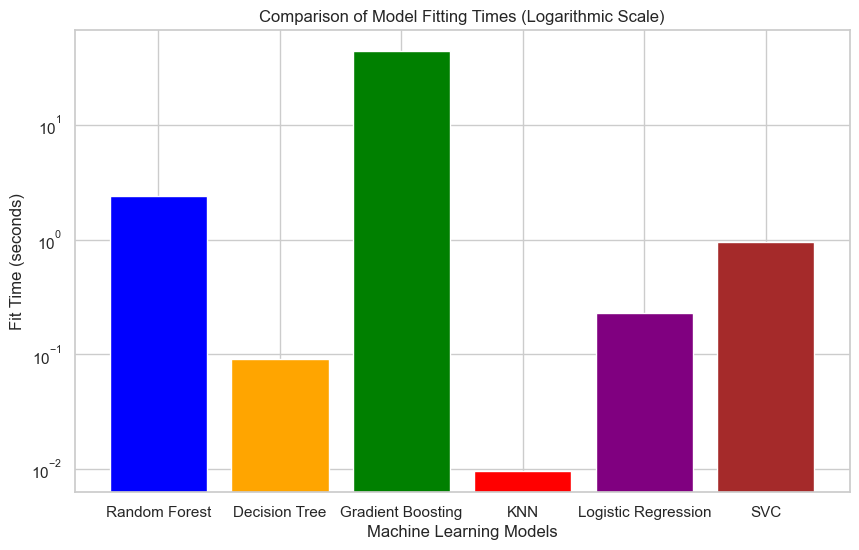

In [57]:



# Fitting times data
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'KNN', 'Logistic Regression', 'SVC']
fit_times = [2.42, 0.09, 44.00, 0.0095, 0.23, 0.95]

# Plotting with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(models, fit_times, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Machine Learning Models')
plt.ylabel('Fit Time (seconds)')
plt.title('Comparison of Model Fitting Times (Logarithmic Scale)')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
plt.show()



## Prediction

In [58]:
predictions_knn = knn_model.predict(test_data_scaled_minmax)



In [59]:


# Calculate accuracy score
accuracy_knn = accuracy_score(test_column, predictions_knn)
precision_knn = precision_score(test_column, predictions_knn, average='macro')
recall_knn = recall_score(test_column, predictions_knn, average='macro')
f1_knn = f1_score(test_column, predictions_knn, average='macro')

# Print or use the accuracy score as needed
print(f"Accuracy Score for KNN: {accuracy_knn}")
print(f"Precision Score for KNN: {precision_knn}")
print(f"Recall Score for KNN: {recall_knn}")
print(f"F1 Score for KNN: {f1_knn}")

Accuracy Score for KNN: 0.6445
Precision Score for KNN: 0.65882924628603
Recall Score for KNN: 0.49379554997200786
F1 Score for KNN: 0.5244621178087528


In [60]:
predictions_decisiontree = decision_tree_model.predict(test_data_lt_scaled_minmax)
predictions_dt = pd.DataFrame(predictions_decisiontree, columns=["grade"])

In [61]:

# Calculate accuracy score
accuracy_dt = accuracy_score(test_column, predictions_decisiontree)
precision_dt = precision_score(test_column, predictions_dt, average='macro')
recall_dt = recall_score(test_column, predictions_dt, average='macro')
f1_dt = f1_score(test_column, predictions_dt, average='macro')

print(f"Accuracy Score for Decision Tree: {accuracy_dt}")
print(f"Precision Score for KNN: {precision_dt}")
print(f"Recall Score for KNN: {recall_dt}")
print(f"F1 Score for KNN: {f1_dt}")


Accuracy Score for Decision Tree: 0.744
Precision Score for KNN: 0.5941399270454987
Recall Score for KNN: 0.6199374099687471
F1 Score for KNN: 0.6000315003008673


In [62]:
predictions_gradientboosting = gradient_boosting_model.predict(test_data_lt_scaled)


In [63]:
# Calculate accuracy score
accuracy_gb = accuracy_score(test_column, predictions_gradientboosting)
precision_gb = precision_score(test_column, predictions_gradientboosting, average='macro')
recall_gb = recall_score(test_column, predictions_gradientboosting, average='macro')
f1_gb = f1_score(test_column, predictions_gradientboosting, average='macro')

print(f"Accuracy Score for Gradient boosting: {accuracy_gb}")
print(f"Precision Score for Gradient boosting: {precision_gb}")
print(f"Recall Score for Gradient boosting: {recall_gb}")
print(f"F1 Score for Gradient boosting: {f1_gb}")



Accuracy Score for Gradient boosting: 0.3345
Precision Score for Gradient boosting: 0.3204785882070101
Recall Score for Gradient boosting: 0.4055090085861184
F1 Score for Gradient boosting: 0.27796574366202736


In [64]:
predictions_randomforest = random_forest_model.predict(test_data_lt_scaled_minmax)


In [65]:
accuracy_rf = accuracy_score(test_column, predictions_randomforest)
precision_rf= precision_score(test_column, predictions_randomforest, average='macro')
recall_rf = recall_score(test_column, predictions_randomforest, average='macro')
f1_rf = f1_score(test_column, predictions_randomforest, average='macro')

print(f"Accuracy Score for Random Forest: {accuracy_rf}")
print(f"Precision Score for Random Forest: {precision_rf}")
print(f"Recall Score for Random Forest: {recall_rf}")
print(f"F1 Score for Random Forest: {f1_rf}")



Accuracy Score for Random Forest: 0.835
Precision Score for Random Forest: 0.628351332567365
Recall Score for Random Forest: 0.6198196188465296
F1 Score for Random Forest: 0.6230940816007137


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
predictions_logisticregression = logistic_regression_model.predict(test_data_scaled_robust)

In [67]:
accuracy_lg = accuracy_score(test_column, predictions_logisticregression)


precision_lg= precision_score(test_column, predictions_logisticregression, average='macro')
recall_lg = recall_score(test_column, predictions_logisticregression, average='macro')
f1_lg = f1_score(test_column, predictions_logisticregression, average='macro')


print(f"Accuracy Score for Logistic Regression {accuracy_lg}")
print(f"Precision Score for Logistic Regression: {precision_lg}")
print(f"Recall Score for Logistic Regression: {recall_lg}")
print(f"F1 Score forLogistic Regression: {f1_lg}")


Accuracy Score for Logistic Regression 0.868
Precision Score for Logistic Regression: 0.8404589187212752
Recall Score for Logistic Regression: 0.7494658805542501
F1 Score forLogistic Regression: 0.77822192523901


In [68]:
predictions_svc = svc_model.predict(test_data_scaled_minmax)

In [69]:
accuracy_svc = accuracy_score(test_column, predictions_svc)

precision_svc= precision_score(test_column, predictions_svc, average='macro')
recall_svc = recall_score(test_column, predictions_svc, average='macro')
f1_svc = f1_score(test_column, predictions_svc, average='macro')

print(f"Accuracy Score for SVC {accuracy_svc}")

print(f"Precision Score for Logistic Regression: {precision_svc}")
print(f"Recall Score for Logistic Regression: {recall_svc}")
print(f"F1 Score forLogistic Regression: {f1_svc}")


Accuracy Score for SVC 0.8115
Precision Score for Logistic Regression: 0.6669041078550526
Recall Score for Logistic Regression: 0.7110898512566741
F1 Score forLogistic Regression: 0.6771762638519865


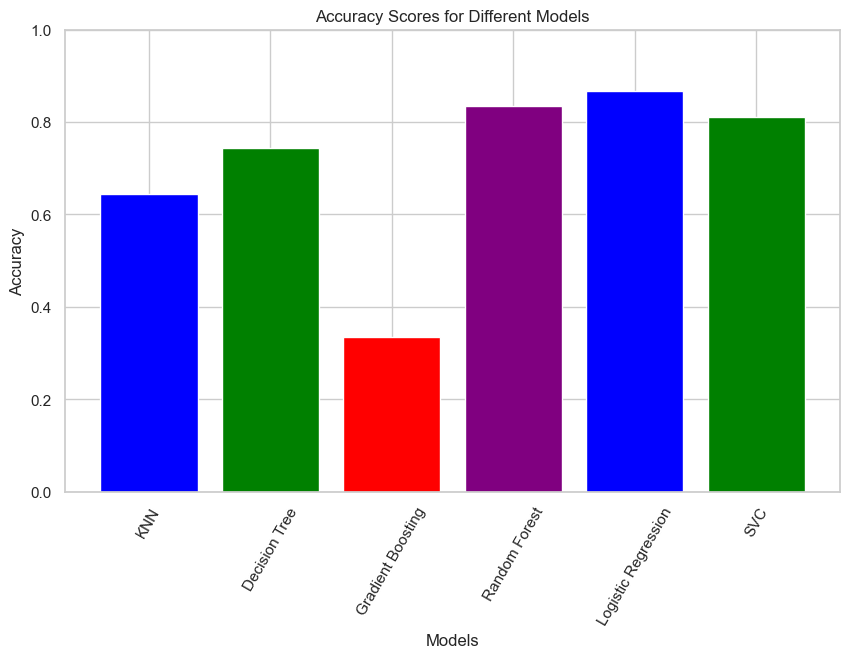

In [70]:
accuracy_scores = {
    'KNN': accuracy_knn,
    'Decision Tree' : accuracy_dt,
    "Gradient Boosting" : accuracy_gb,
    "Random Forest" : accuracy_rf,
    "Logistic Regression" : accuracy_lg,
    'SVC': accuracy_svc,

    # Add other models and their accuracy scores
}

precision_scores = {
    'KNN': precision_knn,
    'Decision Tree' : precision_dt,
    "Gradient Boosting" : precision_gb,
    "Random Forest" : precision_rf,
    "Logistic Regression" : precision_lg,
    'SVC': precision_svc,

    # Add other models and their accuracy scores
}


recall_scores = {
    'KNN': recall_knn,
    'Decision Tree' : recall_dt,
    "Gradient Boosting" : recall_gb,
    "Random Forest" : recall_rf,
    "Logistic Regression" : recall_lg,
    'SVC': recall_svc,

    # Add other models and their accuracy scores
}


f1_scores = {
    'KNN': f1_knn,
    'Decision Tree' : f1_dt,
    "Gradient Boosting" : f1_gb,
    "Random Forest" : f1_rf,
    "Logistic Regression" : f1_lg,
    'SVC': f1_svc,

    # Add other models and their accuracy scores
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=60)
plt.show()

In [71]:
#All accuracy scores

for key,value in accuracy_scores.items():

    print(f"Model {key} has accuracy {value} on test data")

Model KNN has accuracy 0.6445 on test data
Model Decision Tree has accuracy 0.744 on test data
Model Gradient Boosting has accuracy 0.3345 on test data
Model Random Forest has accuracy 0.835 on test data
Model Logistic Regression has accuracy 0.868 on test data
Model SVC has accuracy 0.8115 on test data


In [72]:
#All precision scores

for key,value in precision_scores.items():

    print(f"Model {key} has precision {value} on test data")

Model KNN has precision 0.65882924628603 on test data
Model Decision Tree has precision 0.5941399270454987 on test data
Model Gradient Boosting has precision 0.3204785882070101 on test data
Model Random Forest has precision 0.628351332567365 on test data
Model Logistic Regression has precision 0.8404589187212752 on test data
Model SVC has precision 0.6669041078550526 on test data


In [73]:
#All recall scores

for key,value in recall_scores.items():

    print(f"Model {key} has recall {value} on test data")

Model KNN has recall 0.49379554997200786 on test data
Model Decision Tree has recall 0.6199374099687471 on test data
Model Gradient Boosting has recall 0.4055090085861184 on test data
Model Random Forest has recall 0.6198196188465296 on test data
Model Logistic Regression has recall 0.7494658805542501 on test data
Model SVC has recall 0.7110898512566741 on test data


In [74]:
#All f1 scores

for key,value in f1_scores.items():

    print(f"Model {key} has f1 {value} on test data")

Model KNN has f1 0.5244621178087528 on test data
Model Decision Tree has f1 0.6000315003008673 on test data
Model Gradient Boosting has f1 0.27796574366202736 on test data
Model Random Forest has f1 0.6230940816007137 on test data
Model Logistic Regression has f1 0.77822192523901 on test data
Model SVC has f1 0.6771762638519865 on test data


### To have a baseline, we will run logistic regression with default params and will not scale the data

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

#For Our best Logistic Regression model
conf_matrix_logreg = confusion_matrix(test_column, predictions_logisticregression)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix_logreg)

# Compute and display classification report
class_report = classification_report(test_column, predictions_logisticregression)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[332  25   0   0   0   0   0]
 [ 30 509  42   0   0   0   0]
 [  0  33 536  18   0   0   0]
 [  0   1  31 243  18   0   0]
 [  0   0   0  39  89   5   0]
 [  0   0   0   0  14  21   0]
 [  0   0   0   0   2   6   6]]

Classification Report:
              precision    recall  f1-score   support

           A       0.92      0.93      0.92       357
           B       0.90      0.88      0.89       581
           C       0.88      0.91      0.90       587
           D       0.81      0.83      0.82       293
           E       0.72      0.67      0.70       133
           F       0.66      0.60      0.63        35
           G       1.00      0.43      0.60        14

    accuracy                           0.87      2000
   macro avg       0.84      0.75      0.78      2000
weighted avg       0.87      0.87      0.87      2000



In [89]:

from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier


# Baseline 1: Trivial Acceptor/Rejecter
trivial_model = DummyClassifier(strategy='constant', constant='A')  # Always predicts class 1
trivial_model.fit(train_data_scaled_robust,train_column)
y_pred_trivial = trivial_model.predict(test_data)
accuracy_trivial = accuracy_score(test_column, y_pred_trivial)
print("Trivial Model Accuracy:", accuracy_trivial)

# Baseline 2: Random Classifier
random_model = DummyClassifier(strategy='uniform')  # Predicts randomly
random_model.fit(train_data_scaled_robust,train_column)
y_pred_random = random_model.predict(test_data)
accuracy_random = accuracy_score(test_column, y_pred_trivial)
print("Random Model Accuracy:", accuracy_random)

Trivial Model Accuracy: 0.1785
Random Model Accuracy: 0.1785


In [91]:
# Compute precision, recall, and F1 score for the trivial acceptor/rejecter
precision_trivial = precision_score(test_column, y_pred_trivial,average = 'macro')
recall_trivial = recall_score(test_column, y_pred_trivial,average = 'macro')
f1_trivial = f1_score(test_column, y_pred_trivial,average = 'macro')

print("Trivial Model Precision:", precision_trivial)
print("Trivial Model Recall:", recall_trivial)
print("Trivial Model F1 Score:", f1_trivial)

# Compute precision, recall, and F1 score for the random classifier
precision_random = precision_score(test_column, y_pred_random,average = 'macro')
recall_random = recall_score(test_column, y_pred_random,average = 'macro')
f1_random = f1_score(test_column, y_pred_random,average = 'macro')

print("Random Model Precision:", precision_random)
print("Random Model Recall:", recall_random)
print("Random Model F1 Score:", f1_random)

Trivial Model Precision: 0.0255
Trivial Model Recall: 0.14285714285714285
Trivial Model F1 Score: 0.0432753500212134
Random Model Precision: 0.15196533648485744
Random Model Recall: 0.17709076436726706
Random Model F1 Score: 0.12480336350555181


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
